In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [4]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_rp'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [5]:
y_param = 'logMmin'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
em_params = dict(emulation_point)
del em_params[y_param]

In [6]:
y_param_idx = -1
for idx, p in enumerate(PARAMS):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(PARAMS[y_param_idx].low, PARAMS[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [7]:
hyperparams = {'n_estimators': int(1e3),
              'max_depth': 5}

In [8]:
or_params = PARAMS[:]
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

emu1 = OriginalRecipe(training_dir+'_dense',method = 'gbdt',hyperparams=hyperparams, params=or_params)

In [6]:
GOFs = np.loadtxt('GOFs_gbdt.npy')

In [7]:
len(GOFs)

40

40


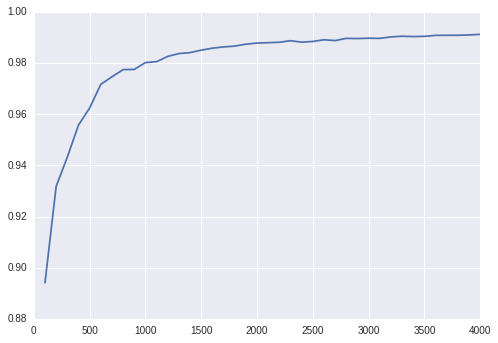

In [13]:
xs = range(100, 4100, 100)
print len(xs)
plt.plot(xs, GOFs)

In [ ]:
xs = range(100, 5000, 100)
plt.plot(xs[10:], GOFs[10:])

In [ ]:
np.savetxt('GOFs_gbdt_depth.npy', GOFs)

In [ ]:
GOFs_gbdt = np.array(GOFs)
GOFs_gp = np.loadtxt('GOFs_gp.npy')
xs = [range(10, 501, 10), range(100, full_x.shape[0]/len(rpoints)+1, 100)]
GOFs = [GOFs_gp, GOFs_gbdt]
labels = ['GPs', 'GBDT']

In [ ]:
for gof,x, label in zip(GOFs,xs, labels):
    print len(x)
    print gof.shape
    plt.plot(x, gof, label = label)
    
plt.show()

In [1]:
%%bash
ls *.npy

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
GOFs.npy
GOFs_gbdt.npy
GOFs_gbdt_depth.npy
GOFs_gbdt_tree.npy
GOFs_gp.npy
densities.npy
gbtr_dense_fhc.npy
gbtr_dense_lhc.npy
gbtr_fhc.npy
gbtr_lhc.npy
gp_fhc.npy
gp_lhc.npy
halo_densities.npy
read_hd.npy
svr_fhc.npy
svr_lhc.npy
